# Comprendre l'algorythm des K_Nearest_Neighbors Classifier

In [7]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [11]:
data = load_digits()
type(data)

sklearn.utils._bunch.Bunch

In [15]:
print (data.target_names)
print (data.feature_names)

[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [17]:
X,y = data.data,data.target

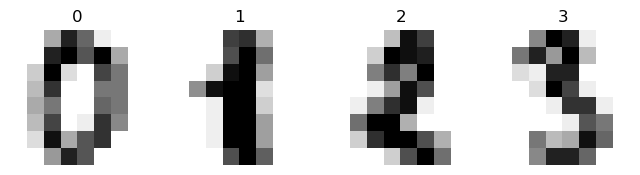

In [29]:
#Visualisons les images et les targets
_, axes = plt.subplots(nrows = 1, ncols =4, figsize =(8,8))
for ax, image, label in zip(axes, data.images, data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap =plt.cm.gray_r, interpolation = "nearest" )
    ax.set_title(label)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
#initialisation de K-NN 
# supposons un k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
model_knn = knn.fit(X_train, y_train)

In [35]:
score = model_knn.score(X_train,y_train)
print(score)

0.9923451635351427


In [39]:
# evaluons ce score avec une cross validation
from sklearn.model_selection import cross_val_score, KFold
crv = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_score = cross_val_score(model_knn,X_train,y_train, cv = crv)
print(cv_score.mean())

0.9860844947735192


In [45]:
""" On peut constater avec aisance que l'algorythm nous a données un score asez confiant"""
# Malgré cela on va essayer de varier le k pour voir un peu la courbe des scores
neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    model_knni = knn.fit(X_train,y_train)
    train_accuracy[i] = model_knni.score(X_train, y_train)
    test_accuracy[i] = model_knni.score(X_test, y_test)
    

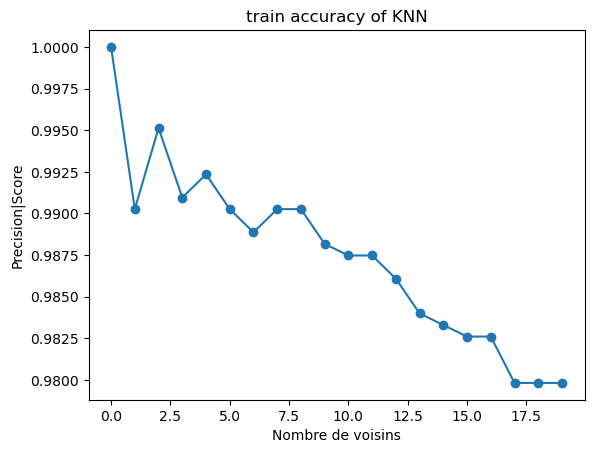

In [49]:
# On va visualiser les scores maintenant
plt.plot (train_accuracy, "o-")
plt.title("train accuracy of KNN")
plt.xlabel("Nombre de voisins")
plt.ylabel("Precision|Score")
plt.show()

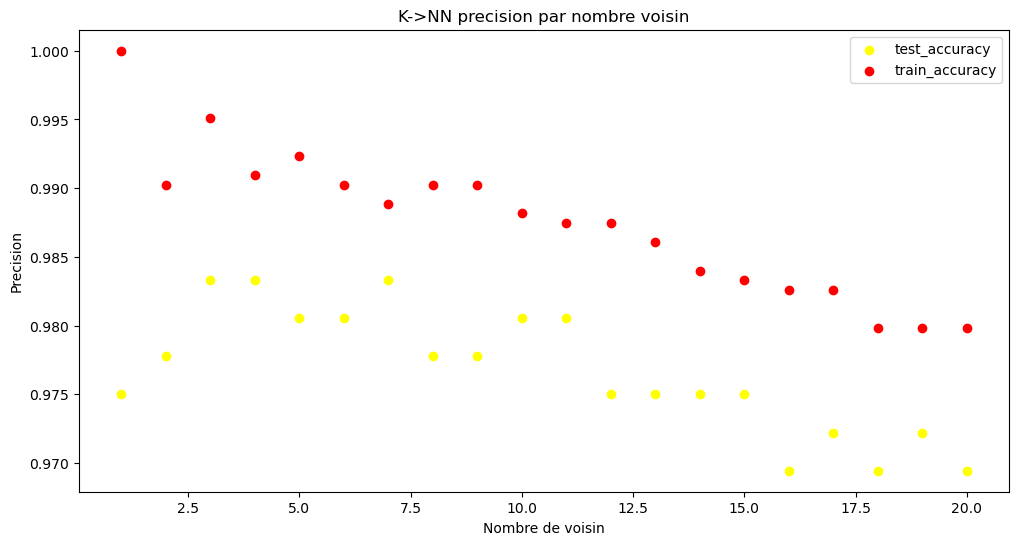

In [53]:
 # Visualisation du taux d'apprentissage
plt.figure(figsize = (12,6))
plt.title("K->NN precision par nombre voisin")
plt.scatter(neighbors,test_accuracy,label = 'test_accuracy', color ="yellow")
plt.scatter(neighbors,train_accuracy,label = 'train_accuracy', color ="red")
plt.legend()
plt.xlabel('Nombre de voisin')
plt.ylabel('Precision')
plt.show()

In [55]:
y_predict = model_knn.predict(X_test)

In [57]:
matrix_c = confusion_matrix(y_test,y_predict)